In [197]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [198]:
housing = pd.read_csv("housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [199]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


notice the missing values in total_bedrooms

In [200]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### Std
Standard deviation implies how dispersed values are.It is average of squared deviation from the mean . _In a Normal Distribution,_ 68% of the values lie 1 sigma of the mean, 95% within 2 sigma, and 99.7% within 3 sigma.

#### 25% 50% 75%
These imply values below which a given percentage of numbers fall. 
_ie 25% of the total houses have a age less than 18._

## hist()
We can also use histograms to check distribution of data over a range of values

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000179D54E5828>,
      dtype=object)

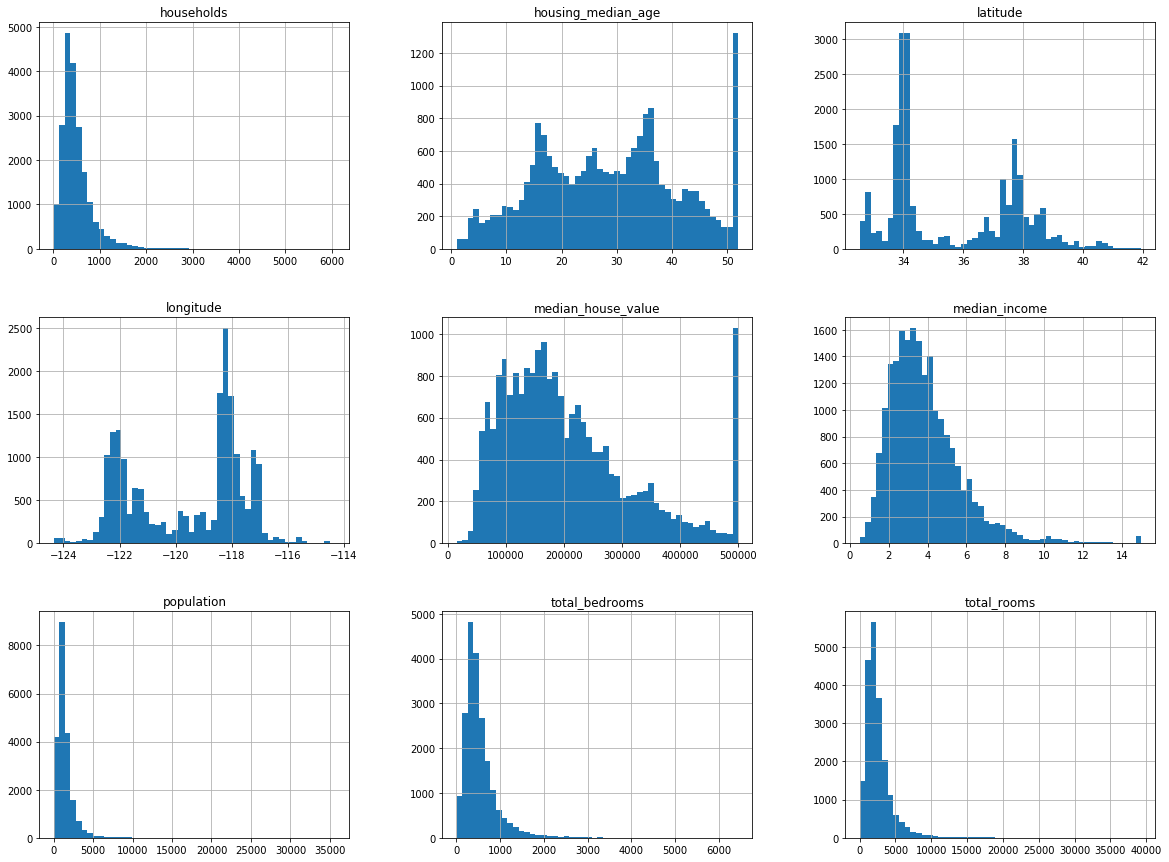

In [201]:
housing.hist(bins=50, figsize=(20,15))

# Create a test set

In [202]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

This type of split is great for large datasets. But in case of smaller datasets, there is a chance that we might introduce a sampling bias.
_For eg in our case we want to ensure that the test case is representative of overall population_

In [203]:
import numpy as np

In [204]:
housing["income_cat"] = np.ceil(housing["median_income"]/1.5) # limit the number of income categories and have discreate values
housing["income_cat"]

0        6.0
1        6.0
2        5.0
3        4.0
4        3.0
5        3.0
6        3.0
7        3.0
8        2.0
9        3.0
10       3.0
11       3.0
12       3.0
13       2.0
14       2.0
15       2.0
16       2.0
17       2.0
18       2.0
19       2.0
20       1.0
21       2.0
22       2.0
23       2.0
24       2.0
25       2.0
26       2.0
27       2.0
28       2.0
29       2.0
        ... 
20610    1.0
20611    1.0
20612    1.0
20613    1.0
20614    2.0
20615    2.0
20616    2.0
20617    3.0
20618    2.0
20619    2.0
20620    4.0
20621    2.0
20622    2.0
20623    2.0
20624    3.0
20625    3.0
20626    2.0
20627    2.0
20628    2.0
20629    2.0
20630    3.0
20631    3.0
20632    3.0
20633    2.0
20634    3.0
20635    2.0
20636    2.0
20637    2.0
20638    2.0
20639    2.0
Name: income_cat, Length: 20640, dtype: float64

In [205]:
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)
housing["income_cat"] # all the values above 5.0 are replaced by 5.0

0        5.0
1        5.0
2        5.0
3        4.0
4        3.0
5        3.0
6        3.0
7        3.0
8        2.0
9        3.0
10       3.0
11       3.0
12       3.0
13       2.0
14       2.0
15       2.0
16       2.0
17       2.0
18       2.0
19       2.0
20       1.0
21       2.0
22       2.0
23       2.0
24       2.0
25       2.0
26       2.0
27       2.0
28       2.0
29       2.0
        ... 
20610    1.0
20611    1.0
20612    1.0
20613    1.0
20614    2.0
20615    2.0
20616    2.0
20617    3.0
20618    2.0
20619    2.0
20620    4.0
20621    2.0
20622    2.0
20623    2.0
20624    3.0
20625    3.0
20626    2.0
20627    2.0
20628    2.0
20629    2.0
20630    3.0
20631    3.0
20632    3.0
20633    2.0
20634    3.0
20635    2.0
20636    2.0
20637    2.0
20638    2.0
20639    2.0
Name: income_cat, Length: 20640, dtype: float64

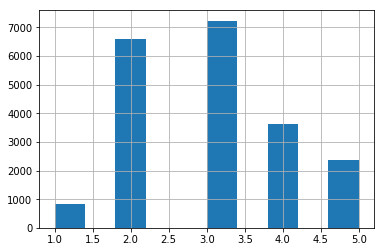

In [206]:
housing["income_cat"].hist()

In [207]:
from sklearn.model_selection import StratifiedShuffleSplit

In [208]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

#### Income Proportion for full datasets

In [209]:
housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

#### Income Proportion for training-test set generated by stratified split

In [210]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [211]:
strat_train_set["income_cat"].value_counts() / len(strat_train_set)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64

In [212]:
strat_train_set.drop("income_cat", axis=1, inplace=True)
strat_test_set.drop("income_cat", axis=1, inplace=True)

## Visualizing Geographical Data

In [213]:
housing = strat_train_set.copy()

#### Scatter plot of longitude and latitude forming map of california

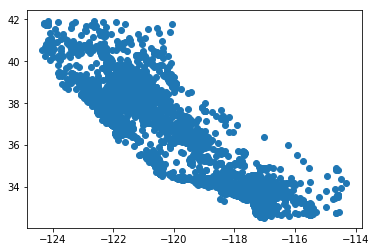

In [214]:
plt.scatter(x=housing['longitude'],y=housing['latitude'])

#### To check Density of houses

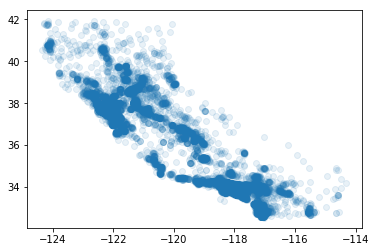

In [215]:
plt.scatter(x=housing['longitude'],y=housing['latitude'], alpha=0.1)

In [216]:
import seaborn as sns

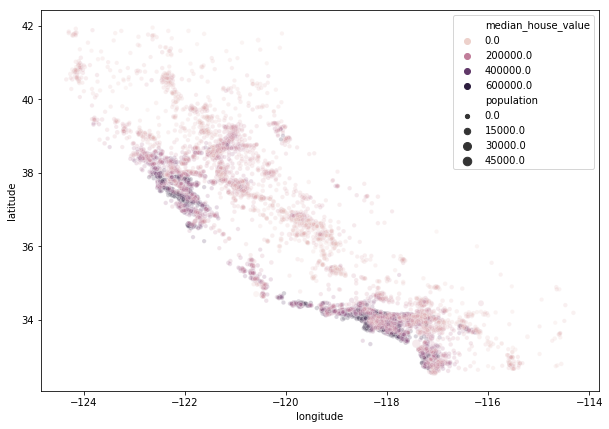

In [217]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=housing['longitude'], y=housing['latitude'],
                alpha=0.2, size=housing['population'],
                hue=housing['median_house_value'], legend="brief" )

## Looing for Correlations

In [218]:
cor_mat = housing.corr()
cor_mat

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


We only need to check correlation between different attributes and median_house_value

In [219]:
cor_mat['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [220]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000179D791FD30>,
      dtype=object)

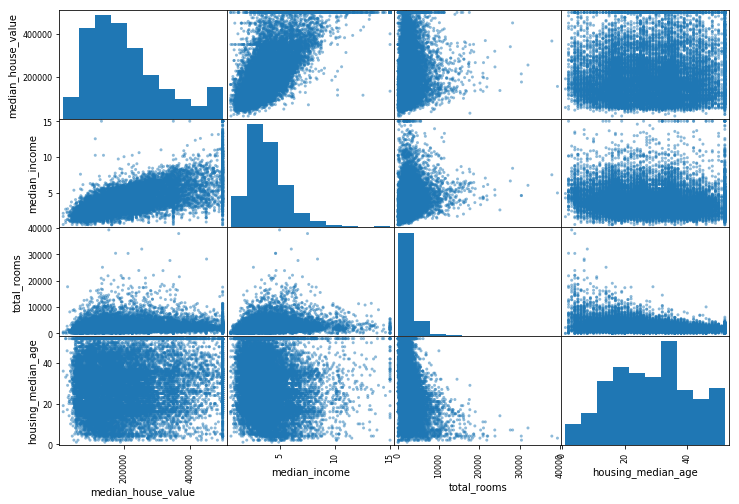

In [221]:
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age' ]
scatter_matrix(housing[attributes], figsize=(12,8))

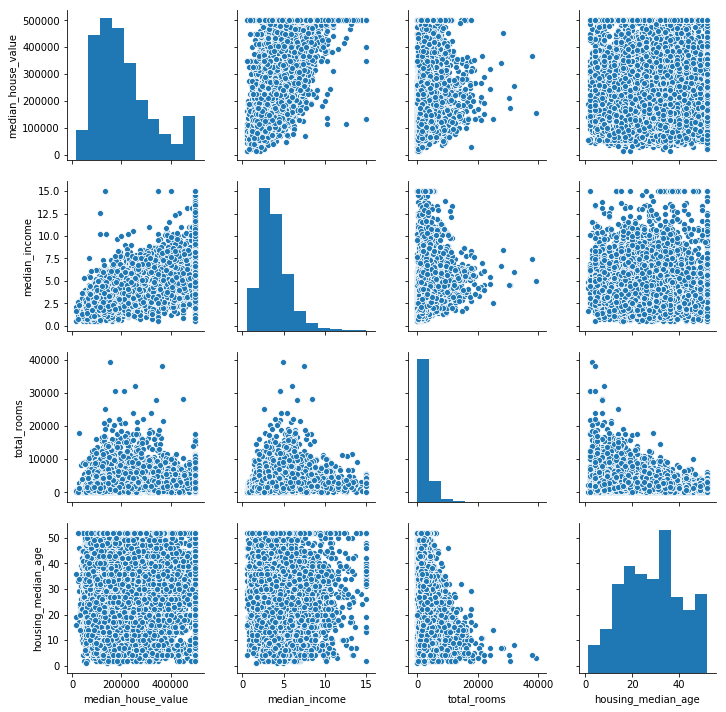

In [222]:
sns.pairplot(housing[attributes], palette='Oranges')

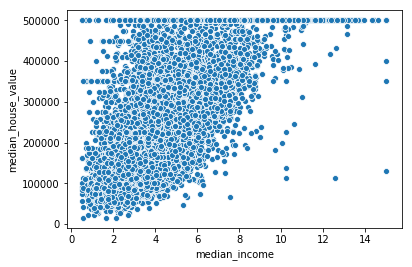

In [223]:
sns.scatterplot(x=housing['median_income'], y=housing['median_house_value'])

We can clearly observe a relation between the house value and the median income

## Attribute Combinations

In [224]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

In [225]:
cor_matrix = housing.corr()
cor_matrix['median_house_value'].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

We can notice how bedrooms_per_room are negetively correlated to the median_house_value

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000179D9FF56D8>,
      dtype=object)

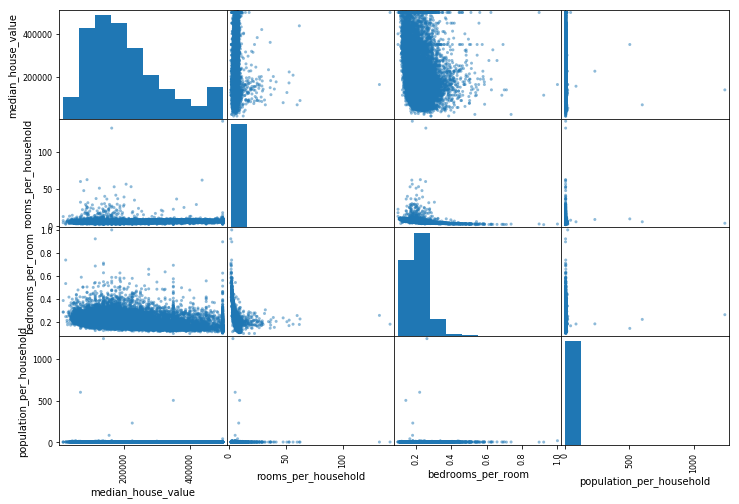

In [226]:
attributes = ['median_house_value', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household' ]
scatter_matrix(housing[attributes], figsize=(12,8))

# Preparing Data For Model

In [227]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

### 1. Data Cleaning

- Get rid of the whole attribute
- Remove the rows with missing values
- Remplace the empty/null values( with 0, mean, median or anything)

In [228]:
from sklearn.impute import SimpleImputer

In [229]:
imputer = SimpleImputer(strategy="median")

In [230]:
housing_num = housing.drop("ocean_proximity", axis=1) # removing non numeric attributes

In [231]:
imputer.fit(housing_num)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

Imputer simply calculates and stores the median for each attribute in 'statistics_'

In [232]:
imputer.statistics_ 

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [233]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [234]:
X = imputer.transform(housing_num)
X # we have got a numpy array

array([[-121.89  ,   37.29  ,   38.    , ...,  710.    ,  339.    ,
           2.7042],
       [-121.93  ,   37.05  ,   14.    , ...,  306.    ,  113.    ,
           6.4214],
       [-117.2   ,   32.77  ,   31.    , ...,  936.    ,  462.    ,
           2.8621],
       ...,
       [-116.4   ,   34.09  ,    9.    , ..., 2098.    ,  765.    ,
           3.2723],
       [-118.01  ,   33.82  ,   31.    , ..., 1356.    ,  356.    ,
           4.0625],
       [-122.45  ,   37.77  ,   52.    , ..., 1269.    ,  639.    ,
           3.575 ]])

In [235]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns) # converting numpy array to a pandas dataframe

### 2. Categorical Attributes

- Label Encoder

In [236]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [237]:
housing_cat = housing[["ocean_proximity"]]

In [238]:
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

C:\Users\Arijit Aakriti\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 4, ..., 1, 0, 3])

In [239]:
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

- OneHotEncoder(Step 2):  to be followed after LabelEncoder

In [240]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

In [241]:
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

C:\Users\Arijit Aakriti\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

To do the whole transformations in *1* single step use
- LabelBinarizer

In [242]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()

In [243]:
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

### Custom Transformers

In [244]:
from sklearn.base import BaseEstimator, TransformerMixin

In [245]:
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6 # storing indexes of the attributes

In [246]:
class CombinedAttributes(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self # nothing else to do
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, bedrooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:,rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [247]:
attr_adder = CombinedAttributes(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)
housing_extra_attribs

array([[-121.89, 37.29, 38.0, ..., '<1H OCEAN', 1.0353982300884956,
        2.094395280235988],
       [-121.93, 37.05, 14.0, ..., '<1H OCEAN', 0.9557522123893806,
        2.7079646017699117],
       [-117.2, 32.77, 31.0, ..., 'NEAR OCEAN', 1.0194805194805194,
        2.0259740259740258],
       ...,
       [-116.4, 34.09, 9.0, ..., 'INLAND', 1.1398692810457516,
        2.742483660130719],
       [-118.01, 33.82, 31.0, ..., '<1H OCEAN', 1.0674157303370786,
        3.808988764044944],
       [-122.45, 37.77, 52.0, ..., 'NEAR BAY', 1.0672926447574336,
        1.9859154929577465]], dtype=object)

#### 3. Feature Scaling And Transformation Pipelines

In [248]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [249]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributes()),
    ('std_scaler', StandardScaler()),
])

In [250]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

Feeding Pandas DataFrame directly to our Pipeline

In [251]:
from sklearn.base import BaseEstimator, TransformerMixin

In [252]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names].values

In [253]:
num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity',]

In [254]:
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributes()),
    ('std_scaler', StandardScaler()),
])

In [255]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [256]:
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

In [257]:
housing_cat_tr = cat_pipeline.fit_transform(housing_cat)

In [258]:
from sklearn.pipeline import FeatureUnion

In [259]:
full_pipeline = FeatureUnion( transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
])

In [260]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [261]:
housing_prepared.shape

(16512, 16)